# Training Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
%matplotlib inline

from tqdm import tqdm
# from time import sleep

### Read raw training data

In [2]:
# OS PATH'/Users/working/Documents/ParsonsSchool/Sp19/MachineLearning/DATASET/amazon_data/raw_data_train.csv'
# WINDOWS PATH "C:/Users/randa/Documents/MLdataset/amazon_data/raw_data_train.csv"
amazon = pd.read_csv('/Users/working/Documents/ParsonsSchool/Sp19/MachineLearning/DATASET/amazon_data/raw_data_train.csv')
print(amazon.shape)

(364000, 14)


In [3]:
print(amazon.head())
print(amazon['helpful'].mean())

   Unnamed: 0  Unnamed: 0.1      Id   ProductId          UserId  \
0      161979        251062  251063  B002INDU22  A16M0DLZ493518   
1       72164        206109  206110  B0050JLAEQ  A2B940BLM1T0V3   
2      452002        334972  334973  B003D4MW38  A2I8UYFVJ5TLHT   
3      419090        119275  119276  B003Z7VYXW  A1YC6AYVXK7NRQ   
4      304509         90726   90727  B003OB4BOS  A29NOSP1RGTQNK   

         ProfileName  HelpfulnessNumerator  HelpfulnessDenominator  Score  \
0            do-good                     0                       0      4   
1              donna                     0                       0      5   
2         greenie227                     1                       1      5   
3  DesDaz "torr0015"                     2                       2      5   
4               Josh                     0                       0      4   

         Time                           Summary  \
0  1331337600                             Works   
1  1348617600    She loves, it, 

# Remove Stopwords

In [4]:
# from gensim.parsing.preprocessing import remove_stopwords
# # remove stop words in amazon.Text
# amazon['Text'] = amazon['Text'].apply(remove_stopwords)
# #newText = amazon['Text'].apply(remove_stopwords)
# print(amazon.Text)



In [5]:
#Lemmatization 



# import nltk
# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer 
#Init the Wordnet Lemmatizer
# lemmatizer = WordNetLemmatizer()

#print(amazon['Text'][0])
#print(lemmatizer.lemmatize(amazon['Text'][0]))

#gensim lemmatize needs pattern, but it is only support python 2.7 or 3.6 below

from gensim.utils import lemmatize
print('**************************************************')
print(lemmatize('Hello World! How is it going?!'))


# lemmAmazon=[]
# for x in amazon['Text']:
#     #for y in amazon['Text'][x]:
#     lemmAmazon.append([wd.decode('utf-8').split('/')[0] for wd in lemmatize(x)])
# print(lemmAmazon)


    
# [wd.decode('utf-8').split('/')[0] for wd in lemmatize('Hello World! How is it going?!')]
# amazon['Text'] = amazon['Text'].apply(lemmatize)
# print(amazon.Text.head())


# leText=newText.apply(lemmatizer.lemmatize)
# print(lemmatizer.lemmatize("my bats"))


# too slow
# for i,w in tqdm(enumerate(amazon['Text'])):
#     amazon['Text'][i] = [[wd.decode('utf-8').split('/')[0] for wd in lemmatize(w)]]

amaLemma=[]
for w in tqdm(amazon['Text']):
    amaLemma.append([wd.decode('utf-8').split('/')[0] for wd in lemmatize(w)])

**************************************************


  0%|          | 13/364000 [00:00<49:34, 122.37it/s]

[b'world/NN', b'be/VB', b'go/VB']


100%|██████████| 364000/364000 [44:05<00:00, 137.61it/s]


In [6]:
print(amaLemma[0][0])

try


In [7]:
amazon['Text'].tail()


print(len(amaLemma))
print(type(amaLemma))

print(amaLemma[0])
print(amaLemma[1])

amaNp=np.array(amaLemma)
amaDF=pd.DataFrame(amaNp)

amaDF.to_csv('/Users/working/Documents/ParsonsSchool/Sp19/MachineLearning/DATASET/amazon_data/AmazonLemmatizedWithStopwords.csv')
print(amaDF)
#amaLemma.to_csv('/Users/working/Documents/ParsonsSchool/Sp19/MachineLearning/DATASET/amazon_data/AmazonLemmatized.csv')

# amaLemmaDF = pd.DataFrame(amaLemma, columns=['Text'])



364000
<class 'list'>
['try', 'be', 'worry', 'not', 'work', 'do', 'work', 'well', 'family', 'have', 'love', 'try', 'even', 'enjoy', 'lunch', 'salad', 'dressing', 'just', 'fruit', 'greek', 'yogurt', 'natural', 'tasty', 'pill', 'be', 'hard', 'take', 'few', 'moment', 'melt', 'work', 'right', 'away', 'last', 'minute', 'active', 'eating', 'think', 'acid', 'sour', 'food', 'wash', 'away', 'try', 'again']
['vet', 'recommend', 'year', 'old', 'cat', 'change', 'diet', 'due', 'blood', 'work', 'come', 'back', 'number', 'be', 'slightly', 'elevated', 'vet', 'say', 'help', 'maintain', 'kidney', 'filter', 'properly', 'put', 'special', 'canned', 'food', 'thank', 'god', 'love', 'food', 'purina', 'kidney', 'function', 'seem', 'be', 'be', 'liking', 'thus', 'far', 'tried', 'science', 'diet', 'walk', 'away', 'recommend', 'food', 'pet']
                                                        0
0       [try, be, worry, not, work, do, work, well, fa...
1       [vet, recommend, year, old, cat, change, diet,...
2

In [8]:
print(amaDF.head())
print(type(amaDF))
print(amaDF[0][0])

# print(amaDF[0][0].dtypes)

                                                   0
0  [try, be, worry, not, work, do, work, well, fa...
1  [vet, recommend, year, old, cat, change, diet,...
2  [be, terrific, tea, buy, make, iced, tea, get,...
3  [have, have, excellent, result, yeast, open, f...
4  [wasn, too, disappointed, someone, enjoy, spic...
<class 'pandas.core.frame.DataFrame'>
['try', 'be', 'worry', 'not', 'work', 'do', 'work', 'well', 'family', 'have', 'love', 'try', 'even', 'enjoy', 'lunch', 'salad', 'dressing', 'just', 'fruit', 'greek', 'yogurt', 'natural', 'tasty', 'pill', 'be', 'hard', 'take', 'few', 'moment', 'melt', 'work', 'right', 'away', 'last', 'minute', 'active', 'eating', 'think', 'acid', 'sour', 'food', 'wash', 'away', 'try', 'again']


In [9]:
# lemmAmazon[0]

# jointTest=' '.join(lemmAmazon[0])

amaDFOut = amaDF[0].apply(' '.join)
print(amaDFOut.head())


0    try be worry not work do work well family have...
1    vet recommend year old cat change diet due blo...
2    be terrific tea buy make iced tea get smooth l...
3    have have excellent result yeast open first pa...
4    wasn too disappointed someone enjoy spicy food...
Name: 0, dtype: object


In [10]:
print(amaDFOut[0])
print(amazon["Text"][0])

print(len(amaDFOut))

try be worry not work do work well family have love try even enjoy lunch salad dressing just fruit greek yogurt natural tasty pill be hard take few moment melt work right away last minute active eating think acid sour food wash away try again
We tried these and I was worried that they may not work. They did work well. My family has loved trying them. We even enjoyed our lunch salad no dressing with just fruit and greek yogurt all natural. Tasty.<br />The pill was hard and took a few moments to melt but it worked right away.  It lasted for 20-25 minutes of active eating. I think the acid in the sour foods washes it away. I would try it again.
364000


### Feature extraction on natural language data

### Extraction By CountVecorizer

In [12]:
# # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# corpus = amazon.Text.as_matrix()
corpus = amaDFOut.as_matrix()
X_bag_of_words = vectorizer.fit_transform(corpus)
print(X_bag_of_words.toarray())

# corpusForId= amazon.ProductId.as_matrix()
# bagOfId= vectorizer.fit_transform(corpusForId)



/anaconda3/envs/Py36env/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
print(X_bag_of_words.shape)
# print(X_bag_of_words[0])
type(X_bag_of_words)

# print(bagOfId[100])


(364000, 76362)


scipy.sparse.csr.csr_matrix

In [14]:
joblib.dump(vectorizer,'vectorizer.pkl')

['vectorizer.pkl']

### Hashing Vectorizer

In [ ]:
# # vectorize Bag of Words from review text; as sparse matrix
# from sklearn.feature_extraction.text import HashingVectorizer
# # hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)
# hv = HashingVectorizer(n_features=2 ** 20, non_negative=True)
# # X_hv = hv.fit_transform(amazon.Text)
# X_hv = hv.fit_transform(amaDFOut)
# print(hv)
# print(X_hv.shape)

In [ ]:
# type(X_hv)

In [ ]:
# # We want to be able to use this model fit on other data (the test set)
# # So let's save a copy of this instance of HashingVectorizer to be able to transform other data with this fit
# # http://scikit-learn.org/stable/modules/model_persistence.html
# joblib.dump(hv, 'hv.pkl') # pickle


In [15]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X_tfidf = transformer.fit_transform(X_bag_of_words)


joblib.dump(transformer, 'transformer.pkl') # pickle

['transformer.pkl']

In [16]:
print(type(X_tfidf))
# print(type(X2_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
# amazon['Pid']= bagOfId
# print(amazon.Pid)

### Time Converting

In [101]:
import datetime
# ts= time.
# amazoneHour = datetime.datetime.fromtimestamp(1331337600).strftime("%H")
# amazoneDay = datetime.datetime.fromtimestamp(1331337600).strftime("%a")

# amazoneTest= datetime.datetime.strftime(datetime.datetime.fromtimestamp(1331337600), "%H")
# # amazoneHour= datetime.datetime.strftime("%H", amazoneHour)
# print(amazoneTest)
# print(amazoneDay)

amazon['amaRead'] = amazon['Time'].apply(datetime.datetime.fromtimestamp)
amazon['amaMonth'] = amazon['amaRead'].apply(datetime.datetime.strftime, format=("%m"))
amazon['amaMonth'] = amazon['amaMonth'].apply(int)
amazon['amaDay'] =amazon['amaRead'].apply(datetime.datetime.weekday)#is , format=("%A"))


amazon['amaYear']=amazon['amaRead'].apply(datetime.datetime.strftime, format=("%Y"))
amazon['amaYear']= amazon['amaYear'].apply(int)
# amazon['readableamaDay'] =amazon['amaRead'].apply(datetime.datetime.strftime , format=("%A"))
# print(amazon['amaRead'].tail(10))
print(amazon['amaMonth'].tail(10))
print(amazon['amaDay'].head(10))
print(amazon['amaYear'].head(10))
# print(amazon['readableamaDay'].head(10))

363990     2
363991     1
363992     6
363993     2
363994     4
363995     4
363996     9
363997    10
363998     8
363999     1
Name: amaMonth, dtype: int64
0    4
1    1
2    6
3    1
4    2
5    6
6    3
7    0
8    5
9    1
Name: amaDay, dtype: int64
0    2012
1    2012
2    2011
3    2012
4    2011
5    2012
6    2012
7    2008
8    2011
9    2012
Name: amaYear, dtype: int64


In [156]:
# ###more feature test


0    12
1     9
2    42
3     1
4     6
5     6
6    27
7     0
8    45
9     9
Name: strangeF, dtype: int64


### Create additional quantitative features

In [219]:
# features from Amazon.csv to add to feature set
amazon['reviewLen'] = amazon['Text'].str.len()
amazon['reviewLenAfterLe'] = amaDFOut.str.len()

amazon['revPlusScore']=  amazon['reviewLen']*amazon['Score']
# print(amazon['strangeF'].head(10))

# X_quant_features = amazon[["Score", "reviewLen","amaDay","amaHour"]]
X_quant_features = amazon[["reviewLen","Score","reviewLenAfterLe","amaDay", "amaMonth", "revPlusScore","amaYear"]]
print(X_quant_features.head(10))
print(type(X_quant_features))

   reviewLen  Score  reviewLenAfterLe  amaDay  amaMonth  revPlusScore  amaYear
0        406      4               242       4         3          1624     2012
1        398      5               278       1         9          1990     2012
2         95      5                58       6         7           475     2011
3        354      5               208       1         1          1770     2012
4        175      4               119       2         3           700     2011
5        252      5               148       6         1          1260     2012
6        206      5               106       3         9          1030     2012
7        972      5               610       0         1          4860     2008
8       1476      5               982       5         9          7380     2011
9        640      5               425       1         9          3200     2012
<class 'pandas.core.frame.DataFrame'>


In [220]:
#try adding time from amazon.csv

### Combine all quantitative features into a single sparse matrix

In [221]:
from scipy.sparse import csr_matrix, hstack
X_quant_features_csr = csr_matrix(X_quant_features)
X_combined = hstack([X_tfidf, X_quant_features_csr])
X_matrix = csr_matrix(X_combined) # convert to sparse matrix
print(X_matrix.shape)

(364000, 76369)


In [222]:
# look at an example of a "row" of a sparse matrix
print(X_matrix[1234])

  (0, 143)	0.08288818068471387
  (0, 316)	0.12002338227779079
  (0, 634)	0.1090312892957206
  (0, 649)	0.1595174171657956
  (0, 1875)	0.04787813739090102
  (0, 2055)	0.09845254992230668
  (0, 3426)	0.06948579502025531
  (0, 4133)	0.07212294592284339
  (0, 5229)	0.19321152620821294
  (0, 6422)	0.05723403222175528
  (0, 7466)	0.0551024648166298
  (0, 7531)	0.33801294607403226
  (0, 9383)	0.1534336781778006
  (0, 10918)	0.07368432312475039
  (0, 13364)	0.08778638927395312
  (0, 13606)	0.08829386649845035
  (0, 14048)	0.08181385943913173
  (0, 15626)	0.25881201485585065
  (0, 18930)	0.03911728150355961
  (0, 20085)	0.08639850233235279
  (0, 20286)	0.13917025869199234
  (0, 23175)	0.0717330833258597
  (0, 24079)	0.160807668837318
  (0, 24639)	0.03905963392590498
  (0, 24972)	0.11276641351908574
  :	:
  (0, 59819)	0.1587126653507582
  (0, 59955)	0.06871791002594894
  (0, 60404)	0.06757683884101522
  (0, 61743)	0.1104682261844962
  (0, 61749)	0.10427680332418586
  (0, 62251)	0.059812253944190

### Create `X`, scaled matrix of features

In [223]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X = sc.fit_transform(X_matrix)
print(X.shape)

joblib.dump(sc, 'sc.pkl') # pickle

(364000, 76369)


['sc.pkl']

### create `y`, vector of Labels

In [224]:
y = amazon['helpful'].values
print(type(y))

<class 'numpy.ndarray'>


# fit models

In [225]:
from my_measures import BinaryClassificationPerformance

### MODEL: ordinary least squares

In [226]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X, y)
joblib.dump(ols, 'ols.pkl') # pickle

ols_performance = BinaryClassificationPerformance(ols.predict(X), y, 'ols')
ols_performance.compute_measures()
print(ols_performance.performance_measures)

/anaconda3/envs/Py36env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


{'Pos': 26628, 'Neg': 337372, 'TP': 303, 'TN': 335065, 'FP': 2307, 'FN': 26325, 'Accuracy': 0.9213406593406593, 'Precision': 0.11609195402298851, 'Recall': 0.011378999549346552, 'desc': 'ols'}


### MODEL: SVM, linear

In [227]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X, y)
joblib.dump(svm, 'svm.pkl') # pickle

svm_performance = BinaryClassificationPerformance(svm.predict(X), y, 'svm')
svm_performance.compute_measures()
print(svm_performance.performance_measures)

{'Pos': 26628, 'Neg': 337372, 'TP': 2135, 'TN': 337369, 'FP': 3, 'FN': 24493, 'Accuracy': 0.9327032967032967, 'Precision': 0.9985968194574368, 'Recall': 0.08017875920084122, 'desc': 'svm'}


### MODEL: logistic regression

In [260]:
from sklearn import linear_model


#for alpha in range(1, 5, 0.1):  #range只能取整数
#tAlpha= np.linspace(0,1,11)
#lgs = linear_model.SGDClassifier(loss='log', n_iter=50, alpha=alpha)

# for alpha in np.linspace(0.00043, 0.0045 ,10):
#     lgs = linear_model.SGDClassifier(loss='log', n_iter=150, alpha=alpha) # default alpha= 0.00001   测试到5
lgs = linear_model.SGDClassifier(loss='log', n_iter=100, alpha=0.0026711)# default alpha= 0.00001   测试到5
#     lgs = linear_model.SGDClassifier(loss='log', max_iter=100, alpha=0.00165)
lgs.fit(X, y)
joblib.dump(lgs, 'lgs.pkl') # pickle
lgs_performance = BinaryClassificationPerformance(lgs.predict(X), y, 'lgs')
lgs_performance.compute_measures()
print(lgs_performance.performance_measures)
# print(alpha)

/anaconda3/envs/Py36env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


{'Pos': 26628, 'Neg': 337372, 'TP': 19871, 'TN': 301896, 'FP': 35476, 'FN': 6757, 'Accuracy': 0.8839752747252747, 'Precision': 0.3590257827885884, 'Recall': 0.746244554604176, 'desc': 'lgs'}


### MODEL: Naive Bayes

In [229]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X, y)
joblib.dump(nbs, 'nbs.pkl') # pickle

nbs_performance = BinaryClassificationPerformance(nbs.predict(X), y, 'nbs')
nbs_performance.compute_measures()
print(nbs_performance.performance_measures)

{'Pos': 26628, 'Neg': 337372, 'TP': 14542, 'TN': 312099, 'FP': 25273, 'FN': 12086, 'Accuracy': 0.8973653846153846, 'Precision': 0.36523923144543513, 'Recall': 0.546116869460718, 'desc': 'nbs'}


### MODEL: Perceptron

In [230]:
from sklearn import linear_model
# for randomS in range(1, 50,1):
prc = linear_model.SGDClassifier(loss='perceptron', random_state=21)
prc.fit(X, y)
joblib.dump(prc, 'prc.pkl') # pickle

prc_performance = BinaryClassificationPerformance(prc.predict(X), y, 'prc')
prc_performance.compute_measures()
#     print(randomS)
print(prc_performance.performance_measures)

/anaconda3/envs/Py36env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


{'Pos': 26628, 'Neg': 337372, 'TP': 19560, 'TN': 267443, 'FP': 69929, 'FN': 7068, 'Accuracy': 0.7884697802197802, 'Precision': 0.2185743499201019, 'Recall': 0.7345651194231636, 'desc': 'prc'}


### MODEL: Ridge Regression Classifier

In [243]:
from sklearn import linear_model


# for NumberRRC in tqdm(np.linspace(0.0001,1,5)):
#     rdg = linear_model.RidgeClassifier(alpha=0.5, tol=0.0001)
rdg = linear_model.RidgeClassifier(alpha=0.5, tol=0.0001, max_iter= 500, normalize = True )
rdg.fit(X, y)
joblib.dump(rdg, 'rdg.pkl') # pickle

rdg_performance = BinaryClassificationPerformance(rdg.predict(X), y, 'rdg')
rdg_performance.compute_measures()
print(rdg_performance.performance_measures)
#     print (NumberRRC)

{'Pos': 26628, 'Neg': 337372, 'TP': 8093, 'TN': 336806, 'FP': 566, 'FN': 18535, 'Accuracy': 0.9475247252747253, 'Precision': 0.9346344843515417, 'Recall': 0.30392819588403186, 'desc': 'rdg'}


/anaconda3/envs/Py36env/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [232]:
rdg.get_params()

{'alpha': 0.5,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 500,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

### What is the distribution of weights, OLS vs. ridge? 

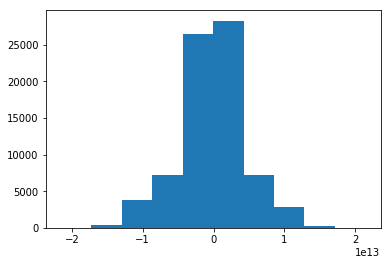

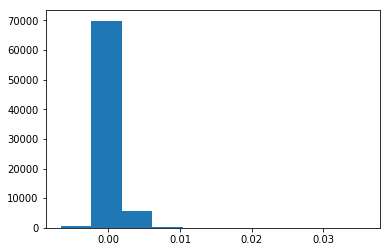

In [233]:
plt.hist(ols.coef_[0])
plt.show()

plt.hist(rdg.coef_[0])
plt.show()

### MODEL: Decision Tree Classifier

In [234]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(max_depth=100)
dtc.fit(X_matrix, y)
joblib.dump(dtc, 'dtc.pkl') # pickle

dtc_performance = BinaryClassificationPerformance(dtc.predict(X_matrix), y, 'dtc')
dtc_performance.compute_measures()
print(dtc_performance.performance_measures)

{'Pos': 26628, 'Neg': 337372, 'TP': 17169, 'TN': 337344, 'FP': 28, 'FN': 9459, 'Accuracy': 0.9739368131868131, 'Precision': 0.9983718090364598, 'Recall': 0.644772420009013, 'desc': 'dtc'}


### Random Forests

In [178]:
# from sklearn.ensemble import RandomForestClassifier

# #max_depth 10-100, minsamples_split 样本量大增大, n_estimators弱学习最大迭代次数， 太小欠拟合默认100//min_samples_split =120
# rfc = RandomForestClassifier(max_depth= 100,n_estimators=100)
# rfc.fit(X_matrix, y)
# joblib.dump(rfc, 'rfc.pkl')

# rfc_performance = BinaryClassificationPerformance(rfc.predict(X_matrix), y, 'rfc')
# rfc_performance.compute_measures()
# print(rfc_performance.performance_measures)



In [179]:
# print(rfc.feature_importances_[-10:])
# print(rfc.feature_importances_)

### ROC plot to compare performance of various models and fits

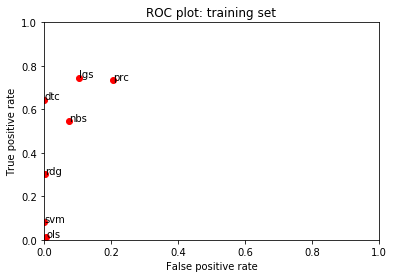

In [261]:
fits = [svm_performance, lgs_performance, rdg_performance, prc_performance, ols_performance, dtc_performance, nbs_performance]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'ro')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: training set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

## a digression: looking inside the `rdg` object

[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)

In [144]:
dir(rdg)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_label_binarizer',
 '_predict_proba_lr',
 '_preprocess_data',
 '_set_intercept',
 'alpha',
 'class_weight',
 'classes_',
 'coef_',
 'copy_X',
 'decision_function',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'max_iter',
 'n_iter_',
 'normalize',
 'predict',
 'random_state',
 'score',
 'set_params',
 'solver',
 'tol']

In [145]:
rdg.get_params()

{'alpha': 0.5,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [146]:
type(rdg.coef_)

numpy.ndarray

In [147]:
rdg.coef_.shape

(1, 76367)

In [148]:
print(rdg.coef_[0])

[-0.00025118 -0.00028911  0.00095594 ...  0.04226933 -0.00469479
 -0.01371418]


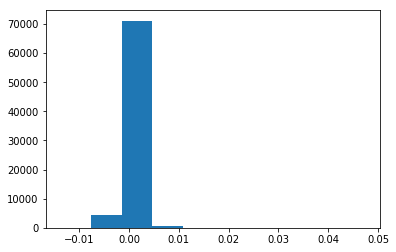

In [149]:
plt.hist(rdg.coef_[0])
plt.show()

# looking at reviews based on their classification

Let's say we decide that Ridge Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [150]:
amazon.loc[0, "Text"]

'We tried these and I was worried that they may not work. They did work well. My family has loved trying them. We even enjoyed our lunch salad no dressing with just fruit and greek yogurt all natural. Tasty.<br />The pill was hard and took a few moments to melt but it worked right away.  It lasted for 20-25 minutes of active eating. I think the acid in the sour foods washes it away. I would try it again.'

In [151]:
amazon.loc[0, "helpful"]

False

In [152]:
ridge_predictions = rdg.predict(X)

In [153]:
ridge_predictions.shape

(364000,)

In [154]:
print(ridge_predictions)

[False False False ...  True False False]


In [155]:
# false positives

import random, time

for i in range(0, len(ridge_predictions)):
    if (ridge_predictions[i] == True):
        if (amazon.loc[i, "helpful"] == False):
            if (random.uniform(0, 1) < 0.05):
                print(i)
                print(time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(amazon.loc[i, "Time"])))
                print(amazon.loc[i, "Score"])
                print(amazon.loc[i, "HelpfulnessDenominator"])
                print(amazon.loc[i, "ProductId"])
                print(amazon.loc[i, "Text"])
                print('* * * * * * * * * ')

21465
2011-09-22 00:00:00
5
1
B003710RWK
Spring In The Air take great pride in delivering their flowers in first class condition. One needs this reassurance when sending that special gift to know the recipient will be delighted..
* * * * * * * * * 
30300
2011-04-07 00:00:00
1
7
B0009YUI86
October 8, 2010. The Blue Buffalo Company of Wilton, Connecticut has announced a dog food recall of certain batches of some of its popular products due to potentially toxic levels of vitamin D.<br /><br />My dog got extremely sick, and was very upset to hear of this.  Only thing that changed with his diet/life was blue buffalo.  I literally almost lost my dog last week and had to have in surgery because his gallbladder was about to explode.  He quit eating completely, was throwing up, diarrhea, and took him to the vet to realize his liver was swollen and gallbladder had to come out.  It's sad to think you pay good money for dog food and you still could be feeding him poison.  I don't know how I will e

142574
2011-11-25 00:00:00
5
1
B000VK08OC
Wedderspoon Raw Organic Manuka Honey is an excellent product.  It has outstanding taste and appearance. It is one of the finest honeys I have ever tasted.
* * * * * * * * * 
150934
2011-01-20 00:00:00
5
3
B001NC8HS6
I was shopping at my local drug store late one Saturday night and I stumbled across this brand of animal crackers. I've tried Barnum and Keebler before but not this brand so I wanted to get it. These Stauffer's Animal Crackers are a lighter version of both the Barnum and Keebler. They have less fat and calories and taste more like a cracker whereas the other 2 are more like cookies. So I guess you can eat more of these without feeling as guilty. One aspect of these Animal Crackers that really stood out for me is that they have amazing shelf life. The package I bought is not the same as this one on Amazon - it more resembled a potato chip package. So I opened it and ate some and then closed it with a clip and then I forgot about it f

291579
2011-06-05 00:00:00
1
2
B000KV61FC
The package says that this is supposed to be practically break-proof, which I thought was perfect for my year-old Beauceron who is a pretty aggressive chewer.  Finally!  A toy that would make his brain work and keep him occupied.<br /><br />Three uses.  First one he very quickly discovered how to get the treats right out.  Second, he learned how to get the screw-off bottom to come off of the jug.  Third time - he chewed the plastic to bits by the time I got it away from him - and he was in the same room with me!<br /><br />I'm a dog trainer and only recommend high-endurance products for my clients.  This didn't even come *close* to meeting my expectations!  Total disappointment.  Will not buy another 'Premier' Busy Buddy toy for my chewer!<br /><br />At almost 3 years old, we still rely on the blue K9 Kongs, Holey Moley, and Everlast Treat balls to stand up to his strong jaws and chew drive!
* * * * * * * * * 
301947
2009-09-10 00:00:00
5
0
B00